# 19 Sept 2022: Building Algos for Univariate Linear Regression

I've been studying up on ML and, now that I have a better sense of some of the math that's happening under the hood, I thought it would be fun to try implementing some basic ML algorithms from scratch. In this journal I'm going to start with univariate linear regression using a squared error cost function.

Because I'm beginning with single-variable linear regression, my model is going to be a simple line:

$f_{w, b}(x) = wx + b$.


Given parameters `w` (that's our slope) and `b` (our y-intercept), we want to take an input value `x` to predict $\hat{y}$.

There are really only two components I'll need to build:
<ol style='line-height:200%'>
    <li>A squared error cost function that calculates the cost of the above model ($\hat{y}$) for `m` samples given parameters `w` and `b`: $J(w, b) = \frac{1}{2m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}-y^{(\imath)})^{2} = \frac{1}{2m}\sum_{\imath=1}^{m}(\hat{y}^{(\imath)}-y^{(\imath)})^{2}$</li>
    <li>A gradient descent algorithm that minimizes our cost function given current parameters `w` and `b` and learning rate $\alpha$. On each iteration parameters `w` and `b` are simultaneously updated as:
        <ul>
            <li>$w = w - \alpha\frac{\partial}{\partial w}J(w,b) = w - \alpha\frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})x^{(\imath)}$</li>
            <li>$b = b - \alpha\frac{\partial}{\partial b}J(w,b) = b - \alpha\frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})$</li>
        </ul>
    </li>
</ol>

### Linear Model

Let's start with linear model $f_{w,b}(x)$. Here's the formula, which is just an equation for a line:

$f_{w,b}(x) = wx + b$

In [1]:
def linear_model(w, b, x):
    '''
    Parameters
    ----------
    w (scalar) : model param, slope
    b (scalar) : model param, y-intercept
    x (scalar) : input sample
    
    Returns
    -------
    y_hat (scalar) : predicted value
    '''
    
    y_hat = w * x + b
    
    return y_hat

### Cost Function

Next is the squared error cost function J(w, b), which, given `m` observations, is $\frac{1}{2}$ x the average of the sum of the squared differences between each predicted value $\hat{y}$ and target value y. That's a mouthful. The equation is easier:

$J(w, b) = \frac{1}{2m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}-y^{(\imath)})^{2} = \frac{1}{2m}\sum_{\imath=1}^{m}(\hat{y}^{(\imath)}-y^{(\imath)})^{2}$

There are a few ways to do this. One way would be to loop through every value of $x_1, x_2, ...x_n$: With each iteration $\imath$ we would calculate $\hat{y}_\imath = wx_\imath + b$, and then add the squared difference of $\hat{y} and y$ to an accumulator variable, which we would finally divide by 2m.

But another way, that's easier and more efficient, is to take advantage of NumPy and perform the same computation in a vectorized. That's how I'll implement it below:

In [2]:
def calculate_cost(w, b, x, y):
    '''
    Vectorized implementation of squared error cost function.
    
    Parameters
    ----------
    w (scalar) : model param, slope
    b (scalar) : model param, y-intercept
    x (nparray) : (m,) input values
    y (nparray) : (m,) target value
    
    Returns
    -------
    cost (scalar) : squared error cost
    '''
    
    m = x.shape[0]
    cost = 0
    
    y_hat = w * x + b
    
    cost = ((y_hat - y) ** 2).sum() / (2 * m)
    
    return cost
        

### Gradient Descent Alorithm

Next is the gradient descent algorithm, which will iterate through values of `w` and `b` in an attempt to minimize cost function J(w,b) given learning rate $\alpha$. On each iteration, parameters `w` and `b` will be simultaneously updated as follows:
<ul style="line-height:200%">
  <li>$w = w - \alpha\frac{\partial}{\partial w}J(w,b) = w - \alpha\frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})x^{(\imath)}$</li>
            <li>$b = b - \alpha\frac{\partial}{\partial b}J(w,b) = b - \alpha\frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})$</li>
</ul>

I'll start with a function that calculates the derivative terms only. That is: 

<ul style="line-height:200%">
    <li><code>dj_db</code>: $\frac{\partial}{\partial w}J(w,b) = \frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})x^{(\imath)}$</li>
  <li><code>dj_dw</code>: $\frac{\partial}{\partial b}J(w,b) = \frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})$</li>
</ul>

As above, we could implement this using a loop that iterates through each value of $x_1, x_2, x_3, ...x_\imath$, but I'll implement the more efficient vectorized version.

In [3]:
def calculate_derivatives(w, b, x, y):
    ''' 
    Parameter
    ---------
    w (scalar) : model param
    b (scalar) : model param
    x (array) : (m,) input values
    y (array) : (m,) target values
    
    Returns
    -------
    dj_dw (scalar) : derivative term for minimizing w
    dj_db (scalar) : derivative term for minimizing b
    '''
    
    m = x.shape[0]
      
    y_hat = w * x + b
    
    dj_dw = ((y_hat - y) * x).sum() / m
    dj_db = (y_hat - y).sum() / m
    
    return dj_dw, dj_db

Now that we have a function to calculate the derivative terms, we can create a gradient descent algorithm, which attempts to find the line of best fit given the input data by minimizing parameters `w` and `b`. On each iteration, then, the alorithm will update `w` and `b` according to the equation we saw above:
<ul style="line-height:200%">
  <li>$w = w - \alpha\frac{\partial}{\partial w}J(w,b) = w - \alpha\frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)})x^{(\imath)} = w - \alpha \hspace{1mm} \times$ <code>dj_dw</code></li>
            <li>$b = b - \alpha\frac{\partial}{\partial b}J(w,b) = b - \alpha\frac{1}{m}\sum_{\imath=1}^{m}(f_{w,b}(x^{(\imath)}) - y^{(\imath)}) = b - \alpha \hspace{1mm} \times$ <code>dj_db</code></li>
</ul>

In [4]:
import math

def run_gradient_descent(w_init, b_init, x, y, cost_func, gradient_func, alpha, iterations=10000):
    
    w = w_init
    b = b_init
    
    history = []
    
    for i in range(1, iterations + 1):
        
        # Calculate derivatives
        dj_dw, dj_db = gradient_func(w, b, x, y)
        
        # Update params `w` and `b` with new vals
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Print current params at max 10 intervals
        if i % (math.ceil(iterations / 10)) == 0:
            print("Iteration {}: cost = {:.2f}, w = {:.2f}, b = {:.2f}"
                  .format(i, cost_func(w, b, x, y), w, b))
        
        # Save output to history array at max 100 intervals
        if i % (math.ceil(iterations / 100)) == 0:
            history.append([i, w, b])

    print("After {} iterations, w = {:.2f} and b = {:.2f} with a cost of {:.2f}"
                  .format(i, w, b, cost_func(w, b, x, y)))
    
    return w, b, history, cost_func(w, b, x, y)

The code could be a bit cleaner, surely, but that should do for a working prototype.

Let's test it out with a sample dataset.

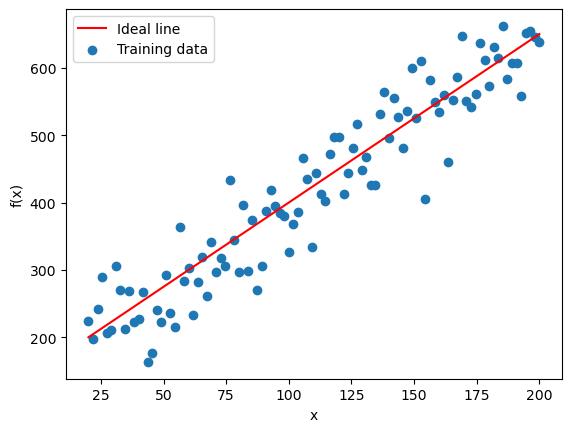

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(20, 200, 100)
b = 150                              # Ideal y-intercept
w = 2.5                              # Ideal slope
y_ideal = w * x_train + b            # Ideal y values

rang = np.random.RandomState(seed=42)
noise = rang.normal(0, 50, x_train.shape)
y_train = w * x_train + b  + noise   # y values with noise

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_train, y_ideal, c='r', label='Ideal line')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend();

Here's our dataset, then, which is based on the ideal line f(x) = 2.5x + 150. Now we'll try running the <code>run_gradient_descent</code> algorithm to see if we can approach those values.

In [6]:
# Set initial parameters
w_init = 0
b_init = 0

# Set alpha and iterations
alpha=0.0001
iterations = 100000

w, b, history, cost = run_gradient_descent(
    w_init=w_init, 
    b_init=b_init, 
    alpha=alpha, 
    x=x_train, 
    y=y_train, 
    cost_func=calculate_cost, 
    gradient_func=calculate_derivatives,
    iterations=iterations)

Iteration 10000: cost = 2282.98, w = 3.40, b = 23.82
Iteration 20000: cost = 1891.21, w = 3.26, b = 43.58
Iteration 30000: cost = 1620.84, w = 3.14, b = 60.00
Iteration 40000: cost = 1434.24, w = 3.03, b = 73.64
Iteration 50000: cost = 1305.46, w = 2.95, b = 84.97
Iteration 60000: cost = 1216.59, w = 2.88, b = 94.39
Iteration 70000: cost = 1155.25, w = 2.82, b = 102.21
Iteration 80000: cost = 1112.92, w = 2.77, b = 108.70
Iteration 90000: cost = 1083.70, w = 2.73, b = 114.10
Iteration 100000: cost = 1063.54, w = 2.70, b = 118.58
After 100000 iterations, w = 2.70 and b = 118.58 with a cost of 1063.54


We can see the model converging as `w` and `b` approach 2.5 and 150, respectively, with each iteration, but even after 100,000 iterations we still haven't converged on what we know to be the ideal line. This suggests we need to increase learning rate $\alpha$ or increase the number of iterations, or both.

Now, I'm finding that even increasing the learning rate even slightly results in not only a model that no longer converges but in our parameters and cost values that quickly grow to infinite proportions. I'm not quite sure why this is. Well, that's not quite true: the derivative values <code>dj_dw</code> and <code>dj_db</code> returned by the <code>calcluate_derivatives()</code> function must be gigantic. But I'm not quite cetain why that is. I'll bracket that for a moment. For now, I'll simply see if I can improve the accuracy of this model by increasing the number of iterations.

In [7]:
# Set initial parameters
w_init = 0
b_init = 0

# Set alpha and iterations
alpha=0.00001
iterations = 500000

w, b, history, cost = run_gradient_descent(
    w_init=w_init, 
    b_init=b_init, 
    alpha=alpha, 
    x=x_train, 
    y=y_train, 
    cost_func=calculate_cost, 
    gradient_func=calculate_derivatives,
    iterations=iterations)

Iteration 50000: cost = 2540.56, w = 3.49, b = 12.47
Iteration 100000: cost = 2282.98, w = 3.40, b = 23.82
Iteration 150000: cost = 2068.99, w = 3.33, b = 34.16
Iteration 200000: cost = 1891.22, w = 3.26, b = 43.58
Iteration 250000: cost = 1743.53, w = 3.19, b = 52.17
Iteration 300000: cost = 1620.85, w = 3.14, b = 60.00
Iteration 350000: cost = 1518.92, w = 3.08, b = 67.14
Iteration 400000: cost = 1434.25, w = 3.03, b = 73.64
Iteration 450000: cost = 1363.91, w = 2.99, b = 79.57
Iteration 500000: cost = 1305.47, w = 2.95, b = 84.97
After 500000 iterations, w = 2.95 and b = 84.97 with a cost of 1305.47


500,000 iterations was overkill, as we can see, since the model seems to have largely convered after about 350,000 or so. And lo and behold, we ended up with w = 2.54 and b = 140.58, which is pretty close to what we know to have been the ideal model. The discrepancy, I think, can be attributed in this case to the limited sample size, which means that the noise I introduced will have an outsized impact.

Let's look at a visualization of how the gradient descent algorithm is fitting a line. I'll run it once more and use the <code>history</code> output to plot the model as it improves with each iteration.

In [8]:
# Set initial parameters
w_init = 0
b_init = 0

# Set alpha and iterations
alpha=0.0001
iterations = 300000

w, b, history, cost = run_gradient_descent(
    w_init=w_init, 
    b_init=b_init, 
    alpha=alpha, 
    x=x_train, 
    y=y_train, 
    cost_func=calculate_cost, 
    gradient_func=calculate_derivatives,
    iterations=iterations)

Iteration 30000: cost = 1620.84, w = 3.14, b = 60.00
Iteration 60000: cost = 1216.59, w = 2.88, b = 94.39
Iteration 90000: cost = 1083.70, w = 2.73, b = 114.10
Iteration 120000: cost = 1040.02, w = 2.65, b = 125.40
Iteration 150000: cost = 1025.66, w = 2.60, b = 131.88
Iteration 180000: cost = 1020.94, w = 2.58, b = 135.60
Iteration 210000: cost = 1019.39, w = 2.56, b = 137.73
Iteration 240000: cost = 1018.88, w = 2.55, b = 138.95
Iteration 270000: cost = 1018.71, w = 2.55, b = 139.65
Iteration 300000: cost = 1018.66, w = 2.54, b = 140.05
After 300000 iterations, w = 2.54 and b = 140.05 with a cost of 1018.66


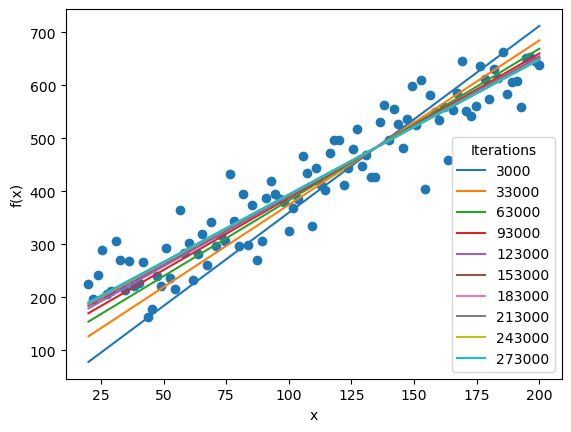

In [9]:
# Plot training data
plt.scatter(x_train, y_train)

# Plot 10 iterations of gradient descent
for i in range(0, len(history), 10):
    w = history[i][1]
    b = history[i][2]
    y_test = x_train * w + b
    plt.plot(x_train, y_test, label=history[i][0])

plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(title='Iterations');

What's remarkable is that even after 3,000 iterations, the model is already beginning to fit the data visually, and with each successive iteration that model is tweaked less and less until we approach our final model: $f_{w,b}(x) = 2.54x + 140.05$

### Takeaways

Even though assembling these functions was more or less a matter of simply translating a few already-worked-out math equations into code, this exercise has been incredibly useful, since it's helping to isolate the specific aspects of the underlying math that I don't really get yet.

For instance, I don't fully understand why a learning rate alpha of e.g. 0.0001 may result in a model that converges but a learning rate of 0.00015 (which, yes, is 50% larger, but still) results in a model whose parameters and cost almost immediately escalate to infinite proportions. In theory I understand that the gradient descent algorithm is overshooting the cost function minimum more and more with each iteration. So perhaps it's more of a question of how to determine an optimal learning rate and whether there a way of picking an initial learning rate that won't result in a model that doesn't converge.

Related to this, what is the relationship between a learning rate and the size of the training dataset? The dataset I used above consisisted of 100 datapoints, but if I run the gradient descent algo with a small subset (i.e., <code>x_train[:10]</code> and <code>y_train[:10]</code>), I can use a much higher learning rate (i.e., 0.001) and get the model to converge almost immediately (i.e., by 10 iterations). This tells me that the derivative terms $\frac{\partial}{\partial w}J(w,b)$ and $\frac{\partial}{\partial b}J(w,b)$ are smaller when the sample size is smaller, but why is that? To be cont.